In [1]:
import pandas as pd
import quantstats as qs
import pandas_montecarlo
import yfinance as yf

qs.extend_pandas()

## Organización de data

In [2]:
sample = 'Registro_de_operaciones_RoboforexMT5_Septiembre2022.xlsx'

In [3]:
df = pd.read_excel(sample, index_col=0)
df

,Symbol,Type,Commission,Swap,GrossProfit,Profit,Balance
datetime,,,,,,,
2022.09.16,NaN,NaN,NaN,NaN,NaN,NaN,18543.00
2022.09.16,EURUSD,sell,-0.12,0.03,2.67,2.58,18545.58
2022.09.19,EURUSD,sell,-0.12,0.00,2.46,2.34,18547.92
2022.09.19,EURUSD,sell,-0.12,0.00,2.67,2.55,18550.47
2022.09.19,EURUSD,sell,-0.12,0.00,-1.05,-1.17,18549.30
...,...,...,...,...,...,...,...
2022.09.30,EURUSD,sell,-0.12,0.00,5.67,5.55,18872.53
2022.09.30,EURUSD,sell,-0.08,0.00,2.06,1.98,18874.51
2022.09.30,EURUSD,sell,-0.08,0.00,2.28,2.20,18876.71


In [4]:
df['pct_bal'] = df['Balance'].pct_change()

In [5]:
df.reset_index(inplace=True)

In [6]:
df

,datetime,Symbol,Type,Commission,Swap,GrossProfit,Profit,Balance,pct_bal
0,2022.09.16,NaN,NaN,NaN,NaN,NaN,NaN,18543.00,NaN
1,2022.09.16,EURUSD,sell,-0.12,0.03,2.67,2.58,18545.58,0.000139
2,2022.09.19,EURUSD,sell,-0.12,0.00,2.46,2.34,18547.92,0.000126
3,2022.09.19,EURUSD,sell,-0.12,0.00,2.67,2.55,18550.47,0.000137
4,2022.09.19,EURUSD,sell,-0.12,0.00,-1.05,-1.17,18549.30,-0.000063
...,...,...,...,...,...,...,...,...,...
127,2022.09.30,EURUSD,sell,-0.12,0.00,5.67,5.55,18872.53,0.000294
128,2022.09.30,EURUSD,sell,-0.08,0.00,2.06,1.98,18874.51,0.000105
129,2022.09.30,EURUSD,sell,-0.08,0.00,2.28,2.20,18876.71,0.000117
130,2022.09.30,EURUSD,sell,-0.08,0.00,-0.42,-0.50,18876.21,-0.000026


In [7]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
df.set_index('datetime', inplace=True)

In [8]:
returns = df['pct_bal']

In [9]:
returns

datetime
2022-09-16         NaN
2022-09-16    0.000139
2022-09-19    0.000126
2022-09-19    0.000137
2022-09-19   -0.000063
                ...   
2022-09-30    0.000294
2022-09-30    0.000105
2022-09-30    0.000117
2022-09-30   -0.000026
2022-09-30    0.000270
Name: pct_bal, Length: 132, dtype: float64

In [10]:
resampled = returns.resample('D').sum()
resampled

datetime
2022-09-16    0.000139
2022-09-17    0.000000
2022-09-18    0.000000
2022-09-19    0.000349
2022-09-20    0.001625
2022-09-21    0.001941
2022-09-22    0.002027
2022-09-23    0.001319
2022-09-24    0.000000
2022-09-25    0.000000
2022-09-26    0.002576
2022-09-27    0.002004
2022-09-28    0.002762
2022-09-29    0.000256
2022-09-30    0.003092
Freq: D, Name: pct_bal, dtype: float64

## Aplico con columna Balance

In [11]:
qs.reports.html(resampled, 'EURUSD=X', output='Recolección de datos/Noviembre2022/DA_vs_EURUSD.html', title='DA_vs_EURUSD')

/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


## Montecarlo

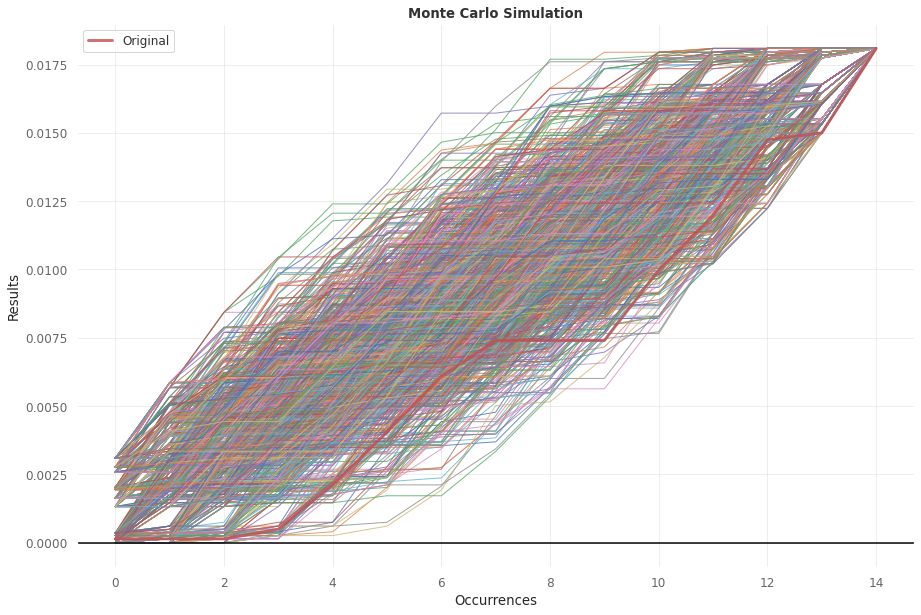

{'min': 0.018090500781879792,
 'max': 0.018090500781879792,
 'mean': 0.01809050078187961,
 'median': 0.018090500781879792,
 'std': 1.8397269781053952e-16,
 'maxdd': nan,
 'bust': 0.0,
 'goal': 0.0}

In [12]:
mc = resampled.montecarlo(sims = 1000, bust = -0.08, goal = 1)
mc.plot(title = 'Monte Carlo Simulation', figsize = (15,10))
mc.stats